<a href="https://colab.research.google.com/github/dmora4/network_measurements_course/blob/main/NML_Lecture2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Iperf

We present an example of using `iperf`

There is not an easy iperf library available on python. Instead we will invoke it from the command line 
> Commands starting with `!` are executed on the command line from this VM

In [ ]:
#install iperf on my vm
!apt-get install iperf3 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  libiperf0 libsctp1
Suggested packages:
  lksctp-tools
The following NEW packages will be installed:
  iperf3 libiperf0 libsctp1
0 upgraded, 3 newly installed, 0 to remove and 22 not upgraded.
Need to get 94.1 kB of archives.
After this operation, 331 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 libsctp1 amd64 1.0.18+dfsg-1 [7,876 B]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libiperf0 amd64 3.7-3 [72.0 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 iperf3 amd64 3.7-3 [14.2 kB]
Fetched 94.1 kB in 1s (124 kB/s)
Selecting previously unselected package libsctp1:amd64.
(Reading database ... 128275 files and directories currently installed.)
Preparing to unpack .../libsctp1_1.0.18+dfsg-1_amd64.deb ...
Unpacking libsctp1:amd64 (1.0.18+dfsg-1) ...
Selecting pr

### What is iperf?
Perform active network performance measurements using two endpoints. 

Check out: `iper.fr/iperf-servers.php` 

This site lists publically available servers from all around the world that can be used for `iperf` measurements. 

>`iperf -s`  Starts iperf as a *server*
>
>`iperf -c xxx.xxx.xxx.xxx` Starts iperf as a *client*

Both machines involved in executing iperf must have iperf installed. Iperf tests are bi-directional. The server we "contact" also performs measurements from it's point of view. Specify the `--get-server-output` flag to get a copy of the measurements observed by the server.

Here we get `paris.testdebit.info` to take iperf measurements with his and we specfy `port 9240`


In [ ]:
!iperf3 -c paris.testdebit.info -p 9240 

Connecting to host paris.testdebit.info, port 9240
[  5] local 172.28.0.12 port 58076 connected to 89.84.1.194 port 9240
[ ID] Interval           Transfer     Bitrate         Retr  Cwnd
[  5]   0.00-1.00   sec  4.26 MBytes  35.7 Mbits/sec   15    792 KBytes       
[  5]   1.00-2.00   sec  20.0 MBytes   168 Mbits/sec    0   7.68 MBytes       
[  5]   2.00-3.00   sec  22.5 MBytes   189 Mbits/sec    0   7.68 MBytes       
[  5]   3.00-4.00   sec  26.2 MBytes   220 Mbits/sec    0   7.68 MBytes       
[  5]   4.00-5.00   sec  26.2 MBytes   220 Mbits/sec    0   7.68 MBytes       
[  5]   5.00-6.00   sec  26.2 MBytes   220 Mbits/sec    0   7.68 MBytes       
[  5]   6.00-7.00   sec  23.8 MBytes   199 Mbits/sec    0   7.68 MBytes       
[  5]   7.00-8.00   sec  25.0 MBytes   210 Mbits/sec    0   7.68 MBytes       
[  5]   8.00-9.00   sec  26.2 MBytes   220 Mbits/sec    0   7.68 MBytes       
[  5]   9.00-10.00  sec  26.2 MBytes   220 Mbits/sec    0   7.68 MBytes       
- - - - - - - - - - - - 

By default, iperf specifically tests TCP.

In [ ]:
!iperf3 -c paris.testdebit.info -p 9240 --get-server-output

Connecting to host paris.testdebit.info, port 9240
[  5] local 172.28.0.12 port 42846 connected to 89.84.1.194 port 9240
[ ID] Interval           Transfer     Bitrate         Retr  Cwnd
[  5]   0.00-1.00   sec  10.2 MBytes  85.3 Mbits/sec    0   7.36 MBytes       
[  5]   1.00-2.00   sec  37.5 MBytes   315 Mbits/sec    0   7.67 MBytes       
[  5]   2.00-3.00   sec  38.8 MBytes   325 Mbits/sec    0   7.67 MBytes       
[  5]   3.00-4.00   sec  37.5 MBytes   315 Mbits/sec    0   7.67 MBytes       
[  5]   4.00-5.00   sec  37.5 MBytes   315 Mbits/sec    0   7.67 MBytes       
[  5]   5.00-6.00   sec  37.5 MBytes   315 Mbits/sec    0   7.67 MBytes       
[  5]   6.00-7.00   sec  37.5 MBytes   315 Mbits/sec    0   7.67 MBytes       
[  5]   7.00-8.00   sec  37.5 MBytes   315 Mbits/sec    0   7.67 MBytes       
[  5]   8.00-9.00   sec  37.5 MBytes   315 Mbits/sec    0   7.67 MBytes       
[  5]   9.00-10.00  sec  37.5 MBytes   315 Mbits/sec    0   7.67 MBytes       
- - - - - - - - - - - - 

**Note:** these are *active* measurements. We are injecting traffic into the network to gather these statistics

### TCP versus UDP
Recall that UDP is a "fire and forget" protocol. With TCP on the otherhand, iperf simply tries to the bandwith and measure performance. When taking iperf measurements of UDP, we have more control over the circumstances that we would like to test (ie, size of packets, transmission speed, etc)


Let's try iperf to inject traffic and measure the performance of UDP.

Useful flags to configure iperf to test UDP:

`-p 5200-5209` sets the range of ports for the other endpoint we can try

`-b 100000` set the bitrate

`-u` sets UDP mode

In [ ]:
!iperf3 -u -c speedtest.shinternet.ch -p 5200-5209 --get-server-output

Connecting to host speedtest.shinternet.ch, port 5200
[  5] local 172.28.0.12 port 42320 connected to 88.213.191.212 port 5200
[ ID] Interval           Transfer     Bitrate         Total Datagrams
[  5]   0.00-1.00   sec   129 KBytes  1.06 Mbits/sec  94  
[  5]   1.00-2.00   sec   128 KBytes  1.05 Mbits/sec  93  
[  5]   2.00-3.00   sec   128 KBytes  1.05 Mbits/sec  93  
[  5]   3.00-4.00   sec   128 KBytes  1.05 Mbits/sec  93  
[  5]   4.00-5.00   sec   128 KBytes  1.05 Mbits/sec  93  
[  5]   5.00-6.00   sec   128 KBytes  1.05 Mbits/sec  93  
[  5]   6.00-7.00   sec   128 KBytes  1.05 Mbits/sec  93  
[  5]   7.00-8.00   sec   128 KBytes  1.05 Mbits/sec  93  
[  5]   8.00-9.00   sec   128 KBytes  1.05 Mbits/sec  93  
[  5]   9.00-10.00  sec   128 KBytes  1.05 Mbits/sec  93  
- - - - - - - - - - - - - - - - - - - - - - - - -
[ ID] Interval           Transfer     Bitrate         Jitter    Lost/Total Datagrams
[  5]   0.00-10.00  sec  1.25 MBytes  1.05 Mbits/sec  0.000 ms  0/931 (0%)  se

Using `iperf` is a good starting point to easily get some quick performance measurements no matter the scenario; iperf is widely used.

**Note** During these demos, Lost/Total Datagrams  indicate zero lost packets... so why keep track at all? Consider a wireless network. If one node is a phone connected to Wi-Fi. we would forsure expect some lost packets.

### SNMP

This is a protocol, not a *tool*. In SNMP, traffic is not injected; it is retreived by an agent according to the specified protocol (TCP, UDP, etc). BUT, there are no public SNMP agents, so to use SNMP you have to have agents configured on the network you are trying to test. Check out the following link for more:

http://www.net-snmp.org/docs/mibs/interfaces.html

### `tcpdump`

Let's play around with tcpdump. There is also a python version, but we start with the native version first (invoked from command line).

What are we installing:

`nettools` for ifconfig

`ping` always useful 

`dnsutil` for dig, a tool to ask DNA to resolve hostnames

`tshark` the command line verison of WireShark

`curl` to perform HTTP requests to webservers

`pyshark` the python verison of WireShark

In [ ]:
!apt-get install net-tools tcpdump iputils-ping dnsutils tshark curl

!pip install --pre scapy[basic]

!pip install pyshark

Reading package lists... Done
Building dependency tree       
Reading state information... Done
curl is already the newest version (7.68.0-1ubuntu2.16).
The following additional packages will be installed:
  bind9-dnsutils bind9-host bind9-libs libc-ares2 liblua5.2-0 libmaxminddb0
  libnl-genl-3-200 libpcap0.8 libsbc1 libsmi2ldbl libspandsp2 libspeexdsp1
  libwireshark-data libwireshark13 libwiretap10 libwsutil11 wireshark-common
Suggested packages:
  mmdb-bin snmp-mibs-downloader geoipupdate geoip-database
  geoip-database-extra libjs-leaflet libjs-leaflet.markercluster wireshark-doc
  apparmor
The following NEW packages will be installed:
  bind9-dnsutils bind9-host bind9-libs dnsutils iputils-ping libc-ares2
  liblua5.2-0 libmaxminddb0 libnl-genl-3-200 libpcap0.8 libsbc1 libsmi2ldbl
  libspandsp2 libspeexdsp1 libwireshark-data libwireshark13 libwiretap10
  libwsutil11 net-tools tcpdump tshark wireshark-common
0 upgraded, 22 newly installed, 0 to remove and 22 not upgraded.
Need to g

In [ ]:
!ifconfig

eth0: flags=4163<UP,BROADCAST,RUNNING,MULTICAST>  mtu 1500
        inet 172.28.0.12  netmask 255.255.0.0  broadcast 172.28.255.255
        ether 02:42:ac:1c:00:0c  txqueuelen 0  (Ethernet)
        RX packets 19344  bytes 26953676 (26.9 MB)
        RX errors 0  dropped 0  overruns 0  frame 0
        TX packets 15769  bytes 241667896 (241.6 MB)
        TX errors 0  dropped 0 overruns 0  carrier 0  collisions 0

lo: flags=73<UP,LOOPBACK,RUNNING>  mtu 65536
        inet 127.0.0.1  netmask 255.0.0.0
        loop  txqueuelen 1000  (Local Loopback)
        RX packets 49656  bytes 13698297 (13.6 MB)
        RX errors 0  dropped 0  overruns 0  frame 0
        TX packets 49656  bytes 13698297 (13.6 MB)
        TX errors 0  dropped 0 overruns 0  carrier 0  collisions 0



By calling `ifconfig`, we see the network interfaces: 

`lo` is a loopback interface used to perform tests (it's not a "real" interface)

`eth0` is an ethernet interface. Let's use it to perform some passive measurements!

Use `tcpdump` to capture all the packets coming in/out of our `eth0` ethernet interface (note, we have to manually stop the execution to stop the capture):

In [ ]:
!tcpdump -i eth0

tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on eth0, link-type EN10MB (Ethernet), capture size 262144 bytes
13:44:16.302755 IP 172.28.0.1.57704 > f979260b939c.8080: Flags [P.], seq 1417433160:1417433621, ack 2803122476, win 501, options [nop,nop,TS val 2234099878 ecr 1528437359], length 461: HTTP: GET /socket.io/?EIO=3&sid=9lnsEy5bN_X11C0vAAAA&t=ORBmzlq&transport=polling HTTP/1.1
13:44:16.302852 IP f979260b939c.8080 > 172.28.0.1.57704: Flags [.], ack 461, win 501, options [nop,nop,TS val 1528437667 ecr 2234099878], length 0
13:44:16.304042 IP f979260b939c.43096 > metadata.google.internal.53: 31612+ PTR? 1.0.28.172.in-addr.arpa. (41)
13:44:16.306394 IP f979260b939c.8080 > 172.28.0.1.57704: Flags [P.], seq 1:1546, ack 461, win 501, options [nop,nop,TS val 1528437670 ecr 2234099878], length 1545: HTTP: HTTP/1.1 200 OK
13:44:16.306413 IP 172.28.0.1.57704 > f979260b939c.8080: Flags [.], ack 1546, win 501, options [nop,nop,TS val 2234099881 ecr 152843

These are all the packets flowing in and out the VM.

`tcpdump` just copies packets and prints on each packet in a row

What info do we see?
*   timestamp
*   type of network
*   src address
*   src port
*   destination address
*   destination port
*   flags
*   sequence numbers
*   ACKs piggy-backed by segment
*   we also get some info that helps us understand what was on the payload 

Let's try a dump of specifically UDP packets. 
> Although the tool is called `tcpdump` we can use it to capture non-tcp communication.

In [ ]:
!tcpdump -i eth0 udp

tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on eth0, link-type EN10MB (Ethernet), capture size 262144 bytes

0 packets captured
0 packets received by filter
0 packets dropped by kernel


Oh hey look, nothing was happening over UDP. **Power of a filter:** by applying the `udp` filter, we could quickly determine that there was no UDP traffic without having to parse through all the other traffic captured before.

Let's try to force some UDP traffic so we can see UDP datagrams caught by `tcpdump`

Can be done sereral ways...

 **Use DNS server.** DNS global servers translate hostnames into IP addresses. When we try a name in our browser, the browser transmits a DNS query to a DNS server asking for the IP address of website name. The DNS server responds with the IP address, and guess what...**this exchange happens over udp**. 

Dissecting our command:

`-nn` is a flag which means "do not resolve names", ie keep the IP address as is

`& ()` on the command line starts another process concurrently

`sleep 5` to ensure `tcpdump` is running

`> [path/file_name]` redirect the output of `dig` to null file 



In [ ]:
!tcpdump -i eth0 -nn udp & (sleep 5; dig www.polimi.it > /dev/null)

tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on eth0, link-type EN10MB (Ethernet), capture size 262144 bytes
13:57:04.886336 IP 172.28.0.12.47026 > 169.254.169.254.53: 9196+ [1au] A? www.polimi.it. (54)
13:57:05.054833 IP 169.254.169.254.53 > 172.28.0.12.47026: 9196 1/0/1 A 131.175.187.72 (58)

2 packets captured
2 packets received by filter
0 packets dropped by kernel


### Exercise: Use tcpdump &() to capture ICMP packets

In [ ]:
!tcpdump -i eth0 -nn icmp &(sleep 5; ping www.google.com -c 10 > /dev/null)

Since this output gives us timestamps, we could also derive RTT measrurements.

Explore more `tcpdump`...

It is usually useful to explore protocols such as HTTP
`curl` is like a "minibrowser"... a command-line-based browser.

In fact, check out the output of `curl` with the first website ever!
> http://info.cern.ch/ 



In [ ]:
!curl http://info.cern.ch

Let's perform a `tcpdump` capture while visiting the first website ever:

http://info.cern.ch/ 


**Note** this is HTTP carried over a TCP connection. And remember... our VM has allllooootttt of TCP traffic. 

Can we use a filter? 

Yes! Let's find the IP address of the cern website and then filter the output of `tcpdump` by IP address

In [ ]:
!dig http://info.cern.ch/


; <<>> DiG 9.16.1-Ubuntu <<>> http://info.cern.ch/
;; global options: +cmd
;; Got answer:
;; ->>HEADER<<- opcode: QUERY, status: NXDOMAIN, id: 21324
;; flags: qr rd ra; QUERY: 1, ANSWER: 0, AUTHORITY: 1, ADDITIONAL: 1

;; OPT PSEUDOSECTION:
; EDNS: version: 0, flags:; udp: 512
;; QUESTION SECTION:
;http://info.cern.ch/.		IN	A

;; AUTHORITY SECTION:
.			86400	IN	SOA	a.root-servers.net. nstld.verisign-grs.com. 2023031000 1800 900 604800 86400

;; Query time: 41 msec
;; SERVER: 127.0.0.11#53(127.0.0.11)
;; WHEN: Fri Mar 10 14:04:07 UTC 2023
;; MSG SIZE  rcvd: 124



In [ ]:
!dig info.cern.ch


; <<>> DiG 9.16.1-Ubuntu <<>> info.cern.ch
;; global options: +cmd
;; Got answer:
;; ->>HEADER<<- opcode: QUERY, status: NOERROR, id: 52860
;; flags: qr rd ra; QUERY: 1, ANSWER: 2, AUTHORITY: 0, ADDITIONAL: 1

;; OPT PSEUDOSECTION:
; EDNS: version: 0, flags:; udp: 512
;; QUESTION SECTION:
;info.cern.ch.			IN	A

;; ANSWER SECTION:
info.cern.ch.		897	IN	CNAME	webafs706.cern.ch.
webafs706.cern.ch.	897	IN	A	188.184.21.108

;; Query time: 2 msec
;; SERVER: 127.0.0.11#53(127.0.0.11)
;; WHEN: Fri Mar 10 14:04:07 UTC 2023
;; MSG SIZE  rcvd: 81



In [ ]:
!tcpdump -i eth0 -nn 'tcp and host 188.184.21.108' & (sleep 5; curl -s 'http://info.cern.ch' > /dev/null)

tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on eth0, link-type EN10MB (Ethernet), capture size 262144 bytes
14:04:12.570278 IP 172.28.0.12.40724 > 188.184.21.108.80: Flags [S], seq 2042761199, win 64240, options [mss 1460,sackOK,TS val 805283619 ecr 0,nop,wscale 7], length 0
14:04:12.728287 IP 188.184.21.108.80 > 172.28.0.12.40724: Flags [S.], seq 3346802895, ack 2042761200, win 28960, options [mss 1460,sackOK,TS val 2428485889 ecr 805283619,nop,wscale 7], length 0
14:04:12.728333 IP 172.28.0.12.40724 > 188.184.21.108.80: Flags [.], ack 1, win 502, options [nop,nop,TS val 805283777 ecr 2428485889], length 0
14:04:12.728549 IP 172.28.0.12.40724 > 188.184.21.108.80: Flags [P.], seq 1:77, ack 1, win 502, options [nop,nop,TS val 805283778 ecr 2428485889], length 76: HTTP: GET / HTTP/1.1
14:04:12.886381 IP 188.184.21.108.80 > 172.28.0.12.40724: Flags [.], ack 77, win 227, options [nop,nop,TS val 2428486047 ecr 805283778], length 0
14:04:12.887694 IP 

Let's explain some flags:

*   [S] = seen packet
*   [S.] = seen ACK packet
*   [.] finished the 3-way handshake
*   [F] closing the connection on both sides

Using the `-X` flag, `tcpdump` can be more verbose and perform *deep packet inspection*.

In [ ]:
!tcpdump -i eth0 -nnX 'tcp and host 188.184.21.108' & (sleep 5; curl -s 'http://info.cern.ch' > /dev/null)

tcpdump: verbose output suppressed, use -v or -vv for full protocol decode
listening on eth0, link-type EN10MB (Ethernet), capture size 262144 bytes
10:57:50.401580 IP 172.28.0.12.50646 > 188.184.21.108.80: Flags [S], seq 2431395898, win 64240, options [mss 1460,sackOK,TS val 1698685757 ecr 0,nop,wscale 7], length 0
	0x0000:  4500 003c cc79 4000 4006 eff5 ac1c 000c  E..<.y@.@.......
	0x0010:  bcb8 156c c5d6 0050 90ec 283a 0000 0000  ...l...P..(:....
	0x0020:  a002 faf0 7e7b 0000 0204 05b4 0402 080a  ....~{..........
	0x0030:  653f e33d 0000 0000 0103 0307            e?.=........
10:57:50.509979 IP 188.184.21.108.80 > 172.28.0.12.50646: Flags [S.], seq 3366304913, ack 2431395899, win 28960, options [mss 1460,sackOK,TS val 1726103695 ecr 1698685757,nop,wscale 7], length 0
	0x0000:  4500 003c 0000 4000 3806 c46f bcb8 156c  E..<..@.8..o...l
	0x0010:  ac1c 000c 0050 c5d6 c8a5 bc91 90ec 283b  .....P........(;
	0x0020:  a012 7120 640e 0000 0204 05b4 0402 080a  ..q.d...........
	0x0030:  66e2 

*   Without `-X` flag: we don't get the complete payload, but we get *some* payload info (ie, length, HTTP GET)

*   With `-X`: we get the *complete* payload, byte-by-byte

* `-w [filename]`  write our passive measuremenrts to a file. This is often done to capture some traffic, store it, and analyze it later




In [ ]:
!tcpdump -i eth0 -nnX 'tcp and host 188.184.21.108' -w 'http_capture.pcap' & (sleep 5; curl -s 'http://info.cern.ch' > /dev/null)

tcpdump: listening on eth0, link-type EN10MB (Ethernet), capture size 262144 bytes
10 packets captured
10 packets received by filter
0 packets dropped by kernel


Now, let's import a pcap file and play around with it in python.

In [ ]:
from scapy.all import *

cap = rdpcap('http_capture.pcap')

for packet in cap:
  packet.show()

###[ Ethernet ]### 
  dst       = 02:42:5a:b5:d1:ce
  src       = 02:42:ac:1c:00:0c
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 60
     id        = 44644
     flags     = DF
     frag      = 0
     ttl       = 64
     proto     = 6
     chksum    = 0xe0b
     src       = 172.28.0.12
     dst       = 188.184.21.108
     \options   \
###[ TCP ]### 
        sport     = 54578
        dport     = 80
        seq       = 3370784520
        ack       = 0
        dataofs   = 10
        reserved  = 0
        flags     = S
        window    = 64240
        chksum    = 0x7e7b
        urgptr    = 0
        options   = [('MSS', 1460), ('SAckOK', b''), ('Timestamp', (1028348001, 0)), ('NOP', None), ('WScale', 7)]

###[ Ethernet ]### 
  dst       = 02:42:ac:1c:00:0c
  src       = 02:42:5a:b5:d1:ce
  type      = IPv4
###[ IP ]### 
     version   = 4
     ihl       = 5
     tos       = 0x0
     len       = 60
     id        = 0
     flags 

> Notice: dport 80... this means this connection is over HTTP

But notice ugly output... `scapy` is better for injecting packets. It does not provide a pretty interface to read packets... 

### Let's try `pyshark`

`nest_asyncio` is needed to handle a particularity in using a VM... 

In [ ]:
!pip install nest_asyncio

import pyshark
import os
import nest_asyncio

#nest_asynchio bc in colab we have problems bc of async processes (deadlocks) when using pyshark; do not need this if we use pyshark locally
nest_asyncio.apply()
cap = pyshark.FileCapture('http_capture.pcap')
for packet in cap:
  print(packet)
cap.close()

#doing the same that we did with scapy, looping thru the cap file and printing each packet... we see how pyshark is better to visualize packets than scapy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Packet (Length: 74)
Layer ETH:
	Destination: 02:42:5a:b5:d1:ce
	Address: 02:42:5a:b5:d1:ce
	.... ..1. .... .... .... .... = LG bit: Locally administered address (this is NOT the factory default)
	.... ...0 .... .... .... .... = IG bit: Individual address (unicast)
	Source: 02:42:ac:1c:00:0c
	.... ..1. .... .... .... .... = LG bit: Locally administered address (this is NOT the factory default)
	.... ...0 .... .... .... .... = IG bit: Individual address (unicast)
	Type: IPv4 (0x0800)
	Address: 02:42:ac:1c:00:0c
Layer IP:
	0100 .... = Version: 4
	.... 0101 = Header Length: 20 bytes (5)
	Differentiated Services Field: 0x00 (DSCP: CS0, ECN: Not-ECT)
	0000 00.. = Differentiated Services Codepoint: Default (0)
	.... ..00 = Explicit Congestion Notification: Not ECN-Capable Transport (0)
	Total Length: 60
	Identification: 0xae64 (44644)
	Flags: 0x4000, Don't fragment
	0... .... .... .... = Reserve

`pyshark` is much more detailed.

Let's use a nice feature of pyshark: Instead of printing the entire packet content we can explore the subfields of each packet easily by dot notation.

In [ ]:
nest_asyncio.apply()
cap = pyshark.FileCapture('http_capture.pcap')
for packet in cap:
  print('From: ' + packet.ip.src + ':'+ packet.tcp.srcport + ' To: ' + packet.ip.dst + ':' + packet.tcp.dstport + ' Packet length: ' + packet.length)
cap.close()

From: 172.28.0.12:54578 To: 188.184.21.108:80 Packet length: 74
From: 188.184.21.108:80 To: 172.28.0.12:54578 Packet length: 74
From: 172.28.0.12:54578 To: 188.184.21.108:80 Packet length: 66
From: 172.28.0.12:54578 To: 188.184.21.108:80 Packet length: 142
From: 188.184.21.108:80 To: 172.28.0.12:54578 Packet length: 66
From: 188.184.21.108:80 To: 172.28.0.12:54578 Packet length: 944
From: 172.28.0.12:54578 To: 188.184.21.108:80 Packet length: 66
From: 188.184.21.108:80 To: 172.28.0.12:54578 Packet length: 66
From: 172.28.0.12:54578 To: 188.184.21.108:80 Packet length: 66
From: 188.184.21.108:80 To: 172.28.0.12:54578 Packet length: 66


### Conversations

"Conversations" is feature in wireshark what shows exchanges between unique pairs of 

[src address:src port] and [dst address:dst port]

Wireshark provides some statistics for each conversation:
* duration
* bytes
* src port
* dst port
* src ip
* dst ip

We will need to open `tcp_capture.pcap` using `pyshark`

The objective is to automatically produce a summary of the conversations contained in that pcap file. For each combo of (sr-dst addr, srs-dst port) GROUP and print some stats such as:

*   number of packets transmitted
*   duration of convo
*   avg size of packets from point a to point b


First we capture 5 minutes of traffic from this VM

`-G 300` set the duration to 5 minutes of capture (300 seconds)

`-W [#]` is number of output files we want to generate

`-w [filename]` specificy the name of file we would like to output

In [ ]:
!tcpdump -G 300 -W 1 -w 'tcp_capture.pcap' -i eth0 'tcp'

tcpdump: listening on eth0, link-type EN10MB (Ethernet), capture size 262144 bytes
Maximum file limit reached: 1
1200 packets captured
1201 packets received by filter
0 packets dropped by kernel


In [ ]:
# Hint: makes sense to have a sort of "list" of conversations, and we will need an identifier for these conversations

# Use hash() to generate conversation IDs
conversations = []

srcip = []
srcport = []
dstip = []
dstport = []
first = []
last = []
count = []
avglen = []


nest_asyncio.apply()
cap = pyshark.FileCapture('tcp_capture.pcap')
for packet in cap:
  # print('From: ' + packet.ip.src + ':'+ packet.tcp.srcport + ' To: ' + packet.ip.dst + ':' + packet.tcp.dstport + ' Packet length: ' + packet.length)
#packet.sniff_timestamp
  src = packet.ip.src
  dst = packet.ip.dst
  sport = packet.tcp.srcport
  dport = packet.tcp.dstport
  id = str(src) + str(sport) + str(dst) + str(dport)

  idHash = hash(id)
  print(idHash)
  
  try:

    #conversation exists. update values in our lists that keep track of stats
    convoIndex = conversations.index(idHash)
    oldCount = count[convoIndex]
    oldAvg = avglen[convoIndex]
    avglen[convoIndex] = ((oldAvg * oldCount) + packet.length ) / (oldCount + 1)
    last[convoIndex] = packet.sniff_timestamp
    count[convoIndex] = oldCount + 1
  
  except:

    # new converation:
    conversations.append(idHash)
    srcip.append(src)
    dstip.append(dst)
    srcport.append(sport)
    dstport.append(dport)
    ts = packet.sniff_timestamp
    first.append(ts)
    count.append(1)
    last.append(ts)
    avglen.append(packet.length)

print('Total', len(conversations), 'conversations:')


cap.close()

In [ ]:
conversations.index(275454313756109534)

0

In [ ]:
print(conversations[3])

275454313756109534


## Visualizations

Consider LTE and RTT csv files provided.


RTT measurements were taken from the professor's laptop to specific servers. One column corresponds to RTT measurements taken while on the polimi network. The other column corresponds to RTT measurements taken while connected to a VPN.

In [ ]:
#with pandas easy to read csv and direction produce dataframe
import pandas as pd

#userful to maanaging/visualizing data:
import numpy as np 

#generally used for plotting:
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('RTT_measurements.csv')
display(df)

# can split df into two diff column vectors
no_vpn = df['NO VPN']
vpn = df['VPN']



,NO VPN,VPN
0,1.972,2.679
1,1.688,2.800
2,1.673,2.706
3,1.693,2.702
4,1.949,2.519
...,...,...
395,1.862,2.737
396,1.825,2.743
397,1.813,3.071
398,1.673,2.604


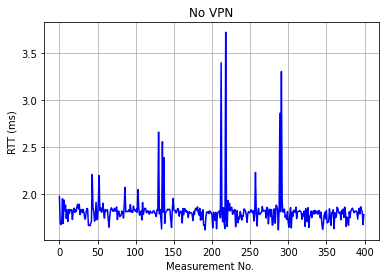

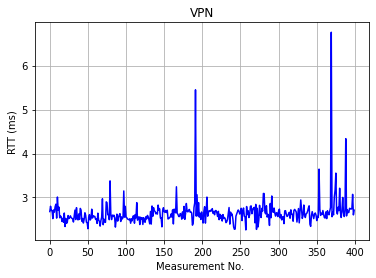

In [ ]:
# Generate a simple plot

fig = plt.figure()
plt.plot(no_vpn, 'b');
plt.title('No VPN')
plt.xlabel('Measurement No. ')
plt.ylabel('RTT (ms)')
plt.grid(visible=True)

fig2 = plt.figure()
plt.plot(vpn, 'b');
plt.title('VPN')
plt.xlabel('Measurement No. ')
plt.ylabel('RTT (ms)')
plt.grid(visible=True)



LTE measurements are the number of downloaded (DL) and uploaded (UL) bytes from/to a cell base station during October 2021. This is a time-series dataset.

In [ ]:
df = pd.read_csv('LTE_measurements.csv')
display(df)


,Date,VOL_DL,VOL_UL
0,04/10/2021 00:00,6439745092,514574060
1,04/10/2021 01:00,3962790419,368510572
2,04/10/2021 02:00,2330641870,268064028
3,04/10/2021 03:00,1439348088,240067764
4,04/10/2021 04:00,1074666616,208859849
...,...,...,...
667,31/10/2021 19:00,8392265664,823810612
668,31/10/2021 20:00,8375786412,805322407
669,31/10/2021 21:00,9592988290,798751010
670,31/10/2021 22:00,9487575199,744624537


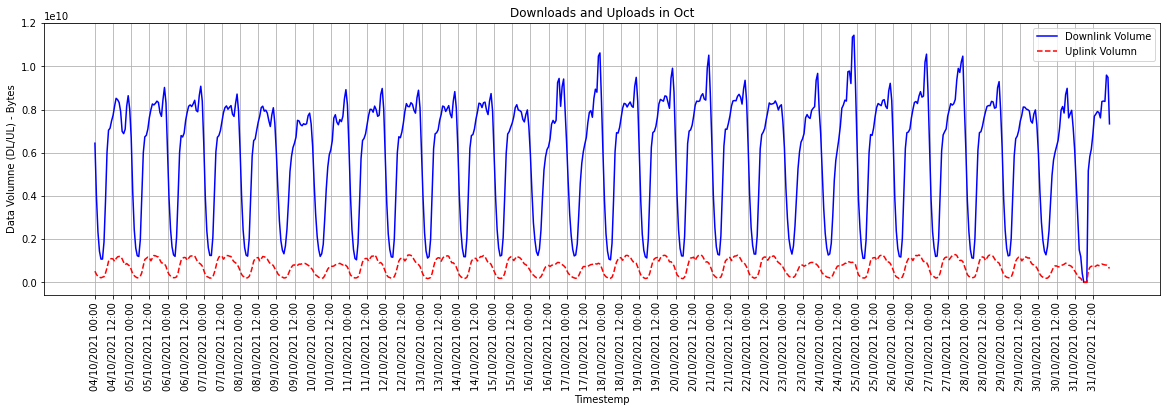

In [ ]:
fig = plt.figure(figsize=(20,5))
plt.plot(df['Date'], df['VOL_DL'], 'b')
plt.plot(df['Date'], df['VOL_UL'], 'r--')
plt.ylabel('Data Volumne (DL/UL) - Bytes')
plt.xlabel('Timestemp')
plt.legend(['Downlink Volume', 'Uplink Volumn'])
plt.grid(visible=True)
plt.title('Downloads and Uploads in Oct')
plt.xticks(np.arange(0,len(df['VOL_DL']), step=len(df['VOL_DL'])/56), rotation = 'vertical');


Can you spot saturday and sunday? Can you see the periodic pattern in this dataset?